# **Data Dictionary:**

* CUSTID : Identification of Credit Card holder (Categorical)
* BALANCE : Balance amount left in their account to make purchases (
* BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES : Amount of purchases made from account
* ONEOFFPURCHASES : Maximum purchase amount done in one-go
* INSTALLMENTSPURCHASES : Amount of purchase done in installment
* CASHADVANCE : Cash in advance given by the user
* PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
* CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
* PURCHASESTRX : Numbe of purchase transactions made
* CREDITLIMIT : Limit of Credit Card for user
* PAYMENTS : Amount of Payment done by user
* MINIMUM_PAYMENTS : Minimum amount of payments made by user
* PRCFULLPAYMENT : Percent of full payment paid by user
* TENURE : Tenure of credit card service for user

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
d = pd.read_csv('CC GENERAL.csv')

In [3]:
d

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


---------------------------------
#### Data Cleaning

In [4]:
ds = d.copy()

In [5]:
ds.isnull().sum().sort_values(ascending = False).head()

MINIMUM_PAYMENTS    313
CREDIT_LIMIT          1
CUST_ID               0
BALANCE               0
PRC_FULL_PAYMENT      0
dtype: int64

In [6]:
print(d.MINIMUM_PAYMENTS.dtypes)
print(d.CREDIT_LIMIT.dtypes)

float64
float64


In [7]:
# Giving varying treatment to features with missing values
ds['CREDIT_LIMIT'] = ds['CREDIT_LIMIT'].fillna(ds['CREDIT_LIMIT'].mean()) #.....Fill null with mean
ds['MINIMUM_PAYMENTS'] = ds['MINIMUM_PAYMENTS'].fillna(ds['MINIMUM_PAYMENTS'].mean()) #.... Fillnull with mode

ds.isnull().sum().sort_values(ascending = False).head(2)

CUST_ID    0
BALANCE    0
dtype: int64

-------------------------------------


Correlation Coefficient


<AxesSubplot:>

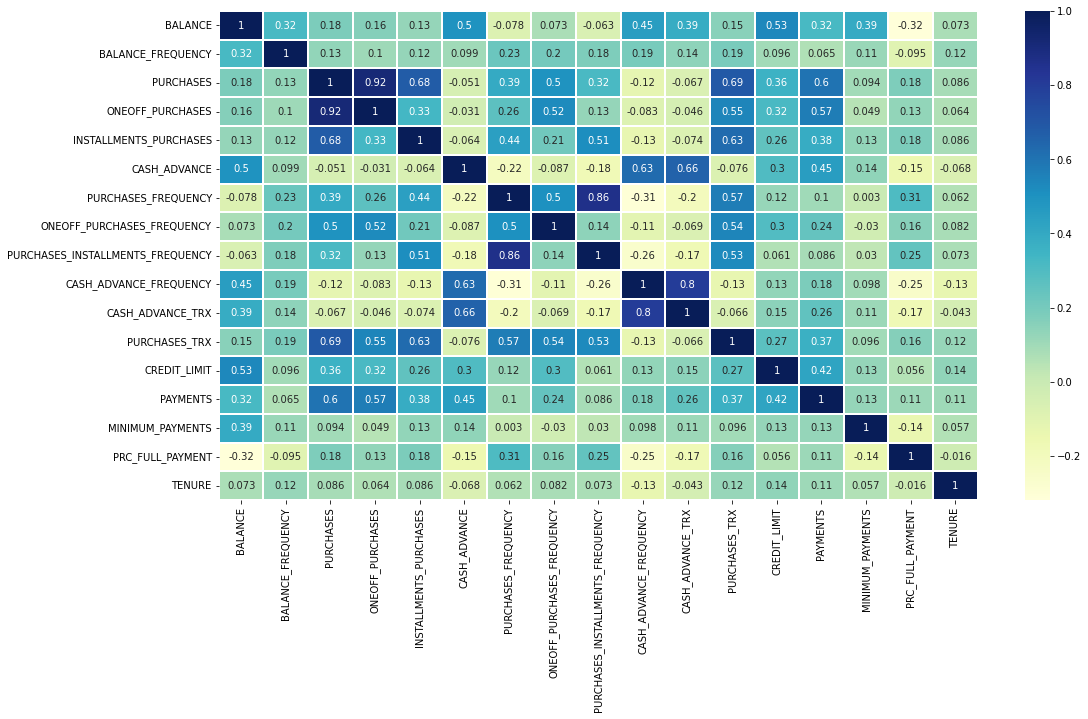

In [8]:
correlate = ds.corr()
  
f, ax = plt.subplots(figsize =(17, 9))
sns.heatmap(correlate, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot = True)

- High positive correlation observed between Purchases and Installment_Purchases <br>
- High positive correlation observed between Cash Advanced TRX and Cash Advanced Frequency

In [9]:
# Drop one of highly correlated features
ds.drop(['CASH_ADVANCE_TRX', 'INSTALLMENTS_PURCHASES'], axis = 1, inplace = True)

-----------------------------
# **K Means Clustering**
##### **Itemize the clusters to deduce from the sets using a 2D-KMeans**
Balance and Purhase Frequency <br>
Purchase Installment Freq and Balance Freq <br>
Cash Advance Freq and Balance Freq <br>
Purchase and One_Off Purchases <br>
Balance Frequency and One_off Purchases <br>
Balance Freq and Purchase Freq

In [10]:
df = ds.copy()

###### Optimum number of K is 4

,ONEOFF_PURCHASES,PURCHASES
0,0.000000,0.001945
1,0.000000,0.000000
2,0.018968,0.015766
3,0.036775,0.030567
4,0.000393,0.000326


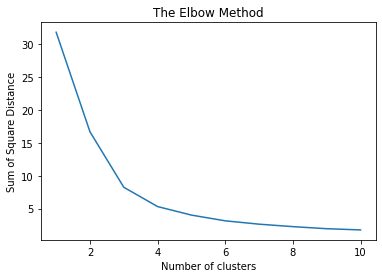

In [11]:
# Clustering of Customers according to 'Purchase' and 'One Off Purchase' of Customers

x1 = df[['ONEOFF_PURCHASES', 'PURCHASES']] #......Selecting the frame to use

scaler = MinMaxScaler() #......................... Scaling using MinMaxScaler

def minmax(b):
    for columnName, columnData in b.iteritems():
        b[columnName] = scaler.fit_transform(np.array(columnData).reshape(-1,1))
minmax(x1)
display(x1.head())

# Using the elbow method, we determine the optimal number of K
sum_sqr_distance = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 97)
    kmeans.fit(x1)
    sum_sqr_distance.append(kmeans.inertia_)
plt.plot(range(1, 11), sum_sqr_distance)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Square Distance')
plt.show()

In [12]:
# The elbow method shows a optimal K number of 4
# Fit KMeans on the frame

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 21) #.......... Instantiate the Clustering Algorithm
kmeans1 = kmeans.fit_predict(x1)
df['cluster_1'] = kmeans1 # .....................Create a column in the Mother Dataframe where customers will be shared into clusters
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_1
0,C10001,40.900749,0.818182,95.40,0.00,0.000000,0.166667,0.000000,0.083333,0.000000,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.000000,1.000000,1.000000,0.000000,0.000000,12,7500.0,622.066742,627.284787,0.000000,12,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,7500.0,0.000000,864.206542,0.000000,12,3
4,C10005,817.714335,1.000000,16.00,16.00,0.000000,0.083333,0.083333,0.000000,0.000000,1,1200.0,678.334763,244.791237,0.000000,12,0


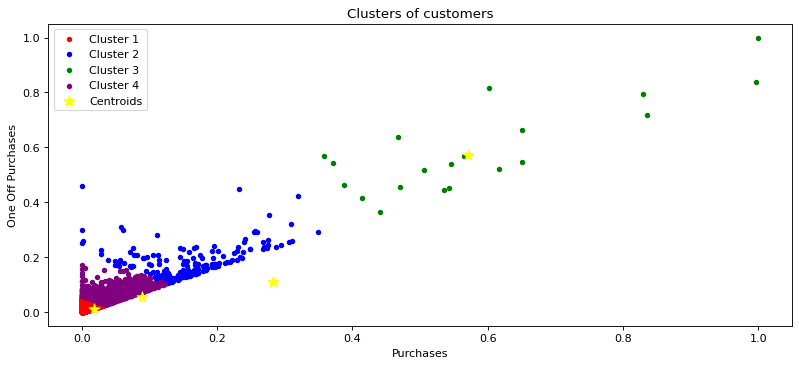

In [64]:
x1['cluster'] = kmeans1 # ................... Create a clustered class column in the selected frame

#  Slice the individual clusters
clust1_1 = x1[x1.cluster == 0] # ............ All cluster 1
clust1_2 = x1[x1.cluster == 1] # ............ All cluster 2
clust1_3 = x1[x1.cluster == 2] # ............ All cluster 3
clust1_4 = x1[x1.cluster == 3] # ............ All cluster 4


# Make a  Visualization of the Clustering classes
plt.figure(figsize=(12, 5), dpi=80)
plt.scatter(clust1_1.ONEOFF_PURCHASES, clust1_1.PURCHASES, s = 15, c = 'red', label = 'Cluster 1')
plt.scatter(clust1_2.ONEOFF_PURCHASES, clust1_2.PURCHASES, s = 15, c = 'blue', label = 'Cluster 2')
plt.scatter(clust1_3.ONEOFF_PURCHASES, clust1_3.PURCHASES, s = 15, c = 'green', label = 'Cluster 3')
plt.scatter(clust1_4.ONEOFF_PURCHASES, clust1_4.PURCHASES, s = 15, c = 'purple', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids', marker = '*')
plt.title('Clusters of customers')
plt.xlabel('Purchases')
plt.ylabel('One Off Purchases')
plt.legend()
plt.show()

**Analysis:** <br>
Clusters in order of left to right <br>
1. Red (First) Cluster: These are customers who have relatively low account and barely make a purchases on the go.
2. Purple(Second) Cluster: These are discount customers who only buys products or service if its been discounted and not listed at full retail price. They should be exposed to more sales deals.
2. Blue(Third) Cluster: These are customers who makes most impulse purchases on the go and often keeps some good amount of balance. They should be targetted with perks and sales discounts so to entice them to make more purchases. 
3. Green(Fourth) Cluster: These are our most valuable customers in terms of impulse purchases who keeps high balance and makes the most purchase. Advertisement strategies should be targetted at these cluster, and also be given high exposure to deals and discounts sales to induce more purchases.

In [70]:
fig = px.scatter(x = x1['ONEOFF_PURCHASES'], y = x1['PURCHASES'], color = x1['cluster'],
                            title = 'Customer Segregation According to One Off Purchases',
                            height=850)
fig.update_layout(xaxis_title = 'Purchases', yaxis_title = 'One Off Purchases')
fig.show()

# #  Display a Histogram of the newly created features
# pup = px.histogram(ds, x='incident_Cat',
#                          title='Incident Charactericstics', height=850,
#                          color_discrete_sequence=['#03DAC5'],
#                          )
# pup.update_xaxes(categoryorder='total descending')

# pup.update_layout(margin=dict(t=70, b=10, l=70, r=40),
#                         hovermode="x unified",
#                         xaxis_tickangle=90,
#                         xaxis_title=' ', yaxis_title=" ",
#                         plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
#                         title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
#                         font=dict(color='#8a8d93'),
#                         legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))


,BALANCE,PURCHASES
0,0.002148,0.001945
1,0.168169,0.000000
2,0.131026,0.015766
3,0.087521,0.030567
4,0.042940,0.000326


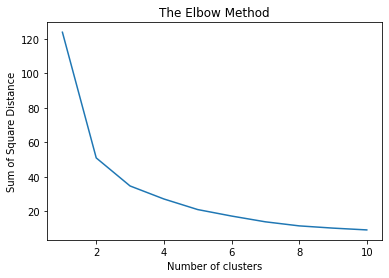

In [14]:
# Clustering of Customers according to Balance and Purchase of Customers

x2 = df[['BALANCE', 'PURCHASES']] #......Selecting the frame to use

scaler = MinMaxScaler() #......................... Scaling using MinMaxScaler

def minmax(b):
    for columnName, columnData in b.iteritems():
        b[columnName] = scaler.fit_transform(np.array(columnData).reshape(-1,1))
minmax(x2)
display(x2.head())

# Using the elbow method, we determine the optimal number of K
sum_sqr_distance = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 97)
    kmeans.fit(x2)
    sum_sqr_distance.append(kmeans.inertia_)
plt.plot(range(1, 11), sum_sqr_distance)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Square Distance')
plt.show()

In [15]:
# Fit KMeans on the frame

kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 21) #...... Used 7 clusters because I had desired output in mind
kmeans2 = kmeans.fit_predict(x2)
df['cluster_2'] = kmeans2 # ................................... Add the cluster column to the Grand DataFrame
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_1,cluster_2
0,C10001,40.900749,0.818182,95.40,0.00,0.000000,0.166667,0.000000,0.083333,0.000000,2,1000.0,201.802084,139.509787,0.000000,12,0,2
1,C10002,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,0,7000.0,4103.032597,1072.340217,0.222222,12,0,3
2,C10003,2495.148862,1.000000,773.17,773.17,0.000000,1.000000,1.000000,0.000000,0.000000,12,7500.0,622.066742,627.284787,0.000000,12,0,3
3,C10004,1666.670542,0.636364,1499.00,1499.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,7500.0,0.000000,864.206542,0.000000,12,3,0
4,C10005,817.714335,1.000000,16.00,16.00,0.000000,0.083333,0.083333,0.000000,0.000000,1,1200.0,678.334763,244.791237,0.000000,12,0,0


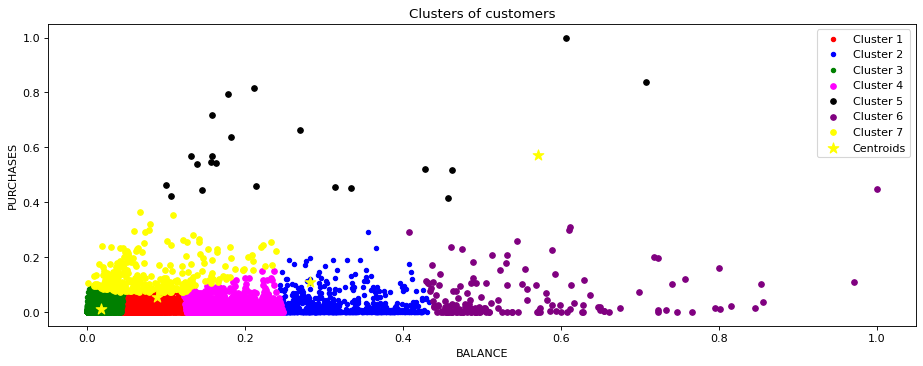

In [63]:
x2['cluster'] = kmeans2 # ................... Create a clustered class column in the selected frame

#  Slice the individual clusters
clust1_1 = x2[x2.cluster == 0] # ............ All cluster 1
clust1_2 = x2[x2.cluster == 1] # ............ All cluster 2
clust1_3 = x2[x2.cluster == 2] # ............ All cluster 3
clust1_4 = x2[x2.cluster == 3] # ............ All cluster 4
clust1_5 = x2[x2.cluster == 4] # ............ All cluster 5
clust1_6 = x2[x2.cluster == 5] # ............ All cluster 6
clust1_7 = x2[x2.cluster == 6] # ............ All cluster 7


# Make a  Visualization of the Clustering classes
plt.figure(figsize=(14, 5), dpi=80)
plt.scatter(clust1_1.BALANCE, clust1_1.PURCHASES, s = 15, c = 'red', label = 'Cluster 1')
plt.scatter(clust1_2.BALANCE, clust1_2.PURCHASES, s = 15, c = 'blue', label = 'Cluster 2')
plt.scatter(clust1_3.BALANCE, clust1_3.PURCHASES, s = 15, c = 'green', label = 'Cluster 3')
plt.scatter(clust1_4.BALANCE, clust1_4.PURCHASES, s = 25, c = 'magenta', label = 'Cluster 4')
plt.scatter(clust1_5.BALANCE, clust1_5.PURCHASES, s = 25, c = 'black', label = 'Cluster 5')
plt.scatter(clust1_6.BALANCE, clust1_6.PURCHASES, s = 25, c = 'purple', label = 'Cluster 6')
plt.scatter(clust1_7.BALANCE, clust1_7.PURCHASES, s = 25, c = 'yellow', label = 'Cluster 7')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids', marker = '*')
plt.title('Clusters of customers')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()

**Analysis** <br> 
In order of Left to Right <br>
1. Green(First) Cluster: These are customers having low balance and makes very low purchases. These customers does not have much purchasing power and should not be our major focus area
2. Yellow(Second) Cluster: These are need based customers who are influnced by specific need. They enter knowing exactly what they want, make the purchase, and then leave. Upselling and cross selling to this segment of custmers may be challenging, though not impossible.
2. Black(Third) Cluster: These are the loyal customers who, although, are middle class earners,  keeps highest frequent purchase of items. They are indicators of improved brand and should be retained through engagement strategies such as offering loyalty card to encourage repeated purchase, turning them into advocates by acknowledging their contribution to business, and also offer mutual incentive to spread words of your business.
4. Blue(Fourth) Cluster: These are the valuable customers with medium to high balance who also barely makes purchases. Considering their low purchases and medium balance, their purchasing power is not be that high. Thus, some special benefits in terms of better credit limit or discounts can be given to convert them into next class.
5. Purple(Fifth) Cluster: These are valuable customers who keeps high balance but makes relatively low purchases when compared. Advertisement strategies such as upselling or cross (bundle) selling strategies, cold callings, etc, should be concerntrated on this cluster of customers to induce more purchases.

,PAYMENTS,PURCHASES
0,0.003979,0.001945
1,0.080893,0.000000
2,0.012264,0.015766
3,0.000000,0.030567
4,0.013374,0.000326


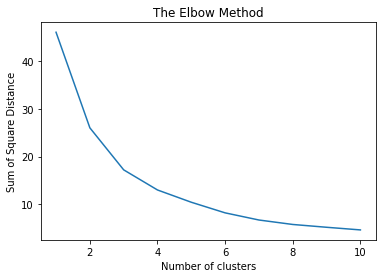

In [59]:
# Clustering of Customers according to Payment and Purchases

x3 = df[['PAYMENTS', 'PURCHASES']] #......Selecting the frame to use

scaler = MinMaxScaler() #......................... Scaling using MinMaxScaler

# scaler.fit(x3[['BALANCE']])
# x3['BALANCE'] = scaler.transform(x3[['BALANCE']])
def minmax(b):
    for columnName, columnData in b.iteritems():
        b[columnName] = scaler.fit_transform(np.array(columnData).reshape(-1,1))
minmax(x3)
display(x3.head())

# Using the elbow method, we determine the optimal number of K
sum_sqr_distance = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 87)
    kmeans.fit(x3)
    sum_sqr_distance.append(kmeans.inertia_)
plt.plot(range(1, 11), sum_sqr_distance)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Square Distance')
plt.show()

In [60]:
# Fit KMeans on the frame

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 81) #.......... Instantiate the Clustering Algorithm
kmeans3 = kmeans.fit_predict(x3)
df['cluster_3'] = kmeans3 # ..................... Add the cluster column to the Grand DataFrame
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_1,cluster_2,cluster_3
0,C10001,40.900749,0.818182,95.40,0.00,0.000000,0.166667,0.000000,0.083333,0.000000,2,1000.0,201.802084,139.509787,0.000000,12,0,2,0
1,C10002,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,0,7000.0,4103.032597,1072.340217,0.222222,12,0,3,2
2,C10003,2495.148862,1.000000,773.17,773.17,0.000000,1.000000,1.000000,0.000000,0.000000,12,7500.0,622.066742,627.284787,0.000000,12,0,3,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,7500.0,0.000000,864.206542,0.000000,12,3,0,0
4,C10005,817.714335,1.000000,16.00,16.00,0.000000,0.083333,0.083333,0.000000,0.000000,1,1200.0,678.334763,244.791237,0.000000,12,0,0,0


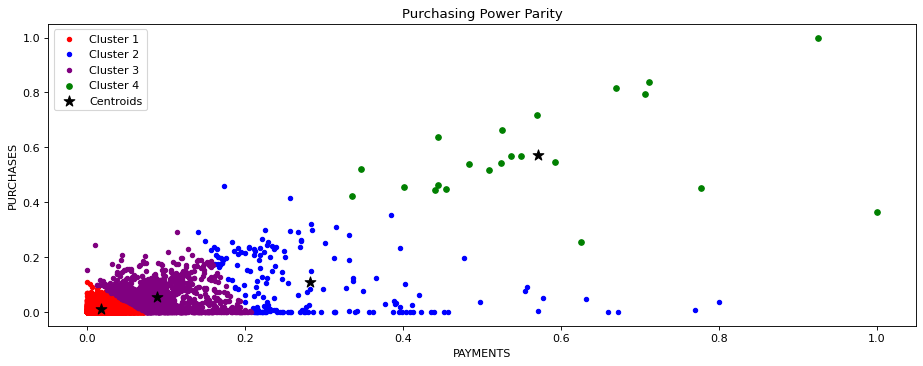

In [61]:
x3['cluster'] = kmeans3 # ................... Create a clustered class column in the selected frame

#  Slice the individual clusters
clust1_1 = x3[x3.cluster == 0] # ............ All cluster 1
clust1_2 = x3[x3.cluster == 1] # ............ All cluster 2
clust1_3 = x3[x3.cluster == 2] # ............ All cluster 3
clust1_4 = x3[x3.cluster == 3] # ............ All cluster 4


# Make a  Visualization of the Clustering classes
plt.figure(figsize=(14, 5), dpi=80)
plt.scatter(clust1_1.PAYMENTS, clust1_1.PURCHASES, s = 15, c = 'red', label = 'Cluster 1')
plt.scatter(clust1_2.PAYMENTS, clust1_2.PURCHASES, s = 15, c = 'blue', label = 'Cluster 2')
plt.scatter(clust1_3.PAYMENTS, clust1_3.PURCHASES, s = 15, c = 'purple', label = 'Cluster 3')
plt.scatter(clust1_4.PAYMENTS, clust1_4.PURCHASES, s = 25, c = 'green', label = 'Cluster 4')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids', marker = '*')
plt.title('Purchasing Power Parity')
plt.xlabel('PAYMENTS')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()

# **Analysis**
In order of Left to Right<br>
1. Red(First) Cluster: These are customers who rates very low low in aspect of purchases and payments. They shouldnt be our area of focus
2. Purple(Second) Cluster: These are customers who rates somewhat low in regards to purchases and making payment. Cross selling and upselling strategies, amongst others, could be used to increase the purchases of these customers 
3. Blue(Third) Cluster: These are customers worthy of utmost attention in the sense that they are consistently making medium level purchases and payment. More importantly, cross selling and upselling is quite possible with these group of people. They can be targetted with strategies such as rewards, discounts, raffles, etc.
4. Green(Fourth) Cluster: These are highly transaction customers who makes high purchase and pays more. They should engaged with releases of new product, exposure to luxury products, retainment benefits and discounts.

In [21]:
t = x2.loc[(x2['BALANCE'] >= 0.6)].sort_values(by = 'BALANCE', ascending = False)
t.loc[x2.PURCHASES >= 0.3]

,BALANCE,PURCHASES,cluster
138,1.000000,0.448820,5
501,0.707829,0.837087,4
2823,0.611380,0.308087,5
550,0.606387,1.000000,4


In [24]:
ds.sort_values(by = 'BALANCE', ascending = False).head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
138,C10144,19043.13856,1.0,22009.92,9449.07,0.000000,1.0,0.750000,1.000000,0.000000,216,18000.0,23018.575830,18621.013310,0.0,12
4140,C14256,18495.55855,1.0,5288.28,3657.30,0.000000,1.0,0.583333,1.000000,0.000000,76,22000.0,4246.168346,4227.081580,0.0,12
5488,C15642,16304.88925,1.0,1770.57,0.00,7424.094447,0.5,0.000000,0.416667,0.666667,9,19000.0,5337.961195,8345.641905,0.0,12
6629,C16812,16259.44857,1.0,5024.68,3582.45,328.698275,1.0,0.833333,1.000000,0.083333,143,18000.0,4987.235359,5137.504664,0.0,12
5281,C15429,16115.59640,1.0,684.74,105.30,4354.002428,1.0,0.083333,1.000000,0.583333,15,18000.0,3546.061550,5743.736444,0.0,12
